<a href="https://colab.research.google.com/github/Jit562/TRAIN-HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/TRAIN_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [9]:
df.duplicated().sum()

0

In [10]:
df['Response'].value_counts()

,count
Response,
0,334399
1,46710


In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
df['Gender'].value_counts()

,count
Gender,
Male,206089
Female,175020


In [13]:
def convert_numeric(x):
  if x == 'Male':
    return 1
  else:
    return 0

In [14]:
df['Gender'] = df['Gender'].apply(convert_numeric)

In [15]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [16]:
df.drop(columns=['Vehicle_Age'], inplace=True)

In [17]:
df['Vehicle_Damage']

,Vehicle_Damage
0,Yes
1,No
2,Yes
3,No
4,No
...,...
381104,No
381105,No
381106,No
381107,Yes


In [18]:
def convert_vehical(x):
  if x == 'Yes':
    return 1
  else:
    return 0

In [19]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(convert_vehical)

In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,27496.0,152.0,39,0


In [21]:
df.corr()['Response']

,Response
id,-0.001368
Gender,0.052440
Age,0.111147
Driving_License,0.010155
Region_Code,0.010570
Previously_Insured,-0.341170
Vehicle_Damage,0.354400
Annual_Premium,0.022575
Policy_Sales_Channel,-0.139042
Vintage,-0.001050


In [22]:
cleaned_df = df.drop(columns=['id','Previously_Insured','Policy_Sales_Channel','Vintage'], inplace=True)

In [23]:
df

,Gender,Age,Driving_License,Region_Code,Vehicle_Damage,Annual_Premium,Response
0,1,44,1,28.0,1,40454.0,1
1,1,76,1,3.0,0,33536.0,0
2,1,47,1,28.0,1,38294.0,1
3,1,21,1,11.0,0,28619.0,0
4,0,29,1,41.0,0,27496.0,0
...,...,...,...,...,...,...,...
381104,1,74,1,26.0,0,30170.0,0
381105,1,30,1,37.0,0,40016.0,0
381106,1,21,1,30.0,0,35118.0,0
381107,0,68,1,14.0,1,44617.0,0


In [24]:
df.corr()['Response']

,Response
Gender,0.052440
Age,0.111147
Driving_License,0.010155
Region_Code,0.010570
Vehicle_Damage,0.354400
Annual_Premium,0.022575
Response,1.000000


In [25]:
df.drop(columns=['Driving_License','Region_Code'], inplace=True)

In [26]:
df.corr()['Response']

,Response
Gender,0.052440
Age,0.111147
Vehicle_Damage,0.354400
Annual_Premium,0.022575
Response,1.000000


In [27]:
df['Age'].min()

20

In [28]:
df['Age'].max()

85

In [29]:
df['Age'].mean()

38.822583565331705

<Axes: >

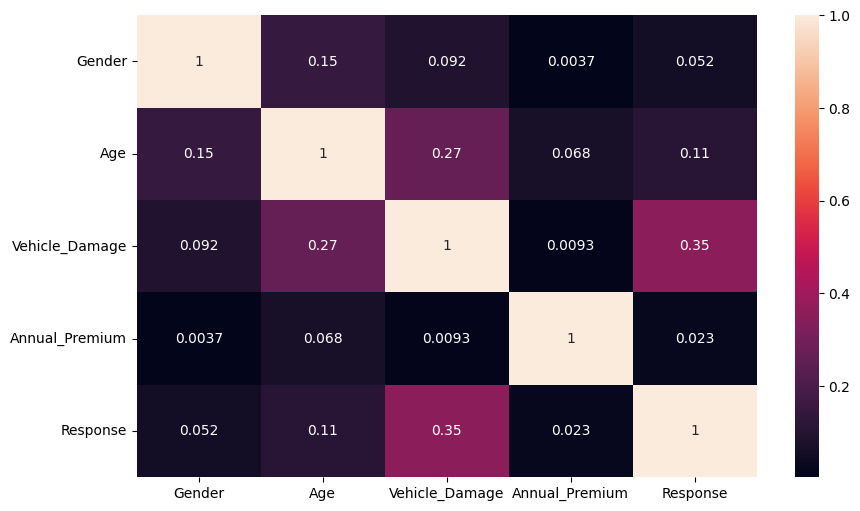

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

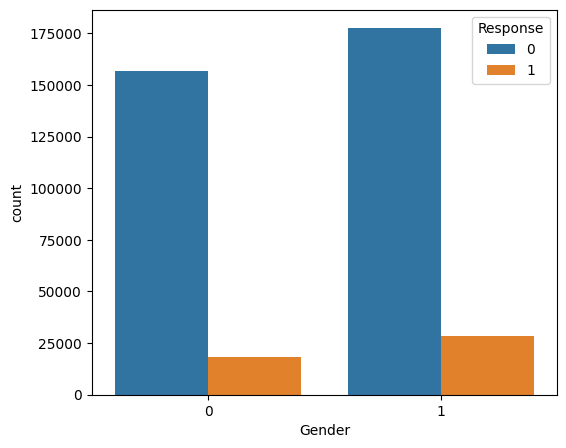

In [31]:
plt.figure(figsize=(6,5))
sns.countplot(x='Gender', hue='Response', data=df)
plt.show()

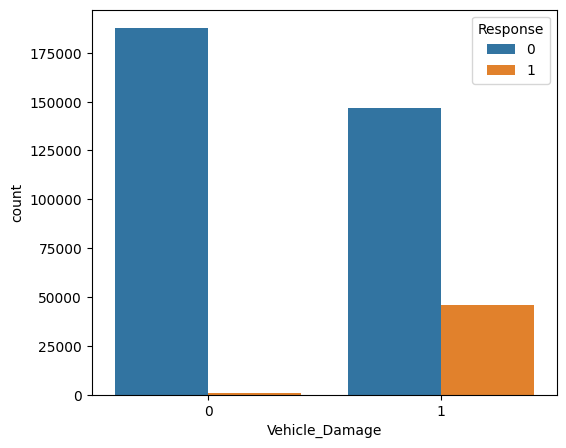

In [32]:
plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.show()

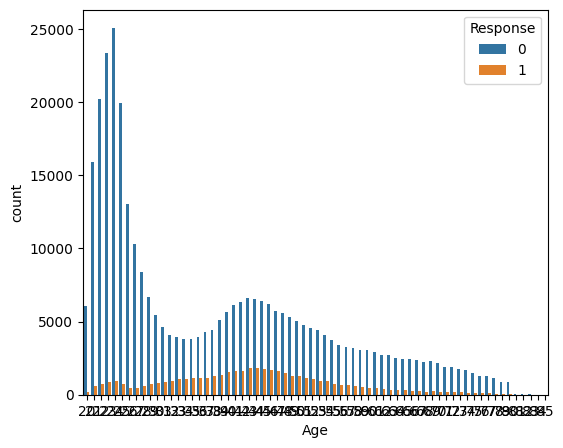

In [33]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['Age'], hue=df['Response'])
plt.show()

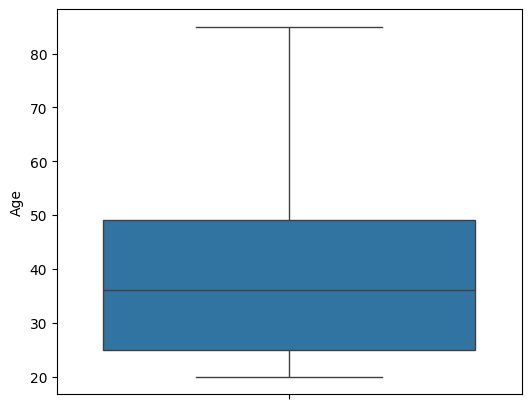

In [34]:
#check outlayer using box plot
plt.figure(figsize=(6,5))
sns.boxplot(df['Age'])
plt.show()

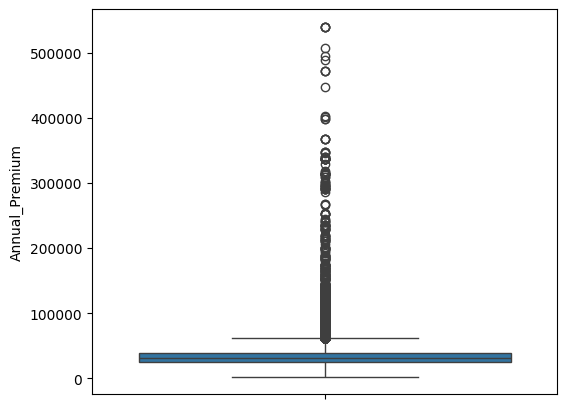

In [35]:
#check outlayer using box plot
plt.figure(figsize=(6,5))
sns.boxplot(df['Annual_Premium'])
plt.show()

In [36]:
df.head()

,Gender,Age,Vehicle_Damage,Annual_Premium,Response
0,1,44,1,40454.0,1
1,1,76,0,33536.0,0
2,1,47,1,38294.0,1
3,1,21,0,28619.0,0
4,0,29,0,27496.0,0


In [37]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Annual_Premium'] >= lower_bound) & (df['Annual_Premium'] <= upper_bound)]

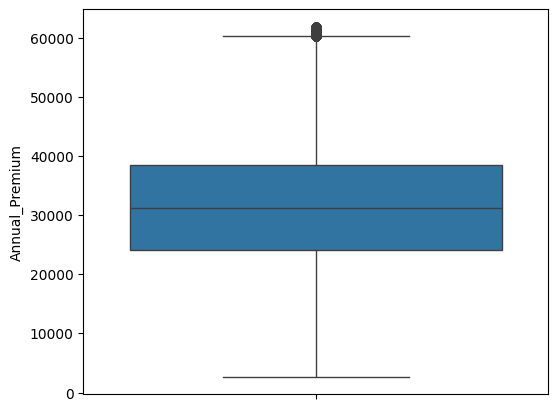

In [38]:
#check outlayer using box plot
plt.figure(figsize=(6,5))
sns.boxplot(df['Annual_Premium'])
plt.show()

In [39]:
def age_scale(x):
  if x < 25:
    return 1
  elif x > 25 and x < 35:
    return 2
  elif x > 35 and x < 45:
    return 3
  elif x > 45 and x < 55:
    return 4
  elif x > 55 and x < 65:
    return 5
  else:
    return 6


In [40]:
df['Age'] = df['Age'].apply(lambda x: age_scale(x))

In [41]:
#feature slection
x = df.drop(columns=['Response'])
y = df['Response']

In [42]:
# handle inbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [43]:
y_smote.value_counts()

,count
Response,
1,325634
0,325634


In [44]:
x_smote.shape, y_smote.shape

((651268, 4), (651268,))

In [45]:
#split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [46]:
#data scale of Annual_Premium
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train['Annual_Premium'] = scaler.fit_transform(x_train[['Annual_Premium']])

In [47]:
x_train['Annual_Premium']

,Annual_Premium
536306,0.012829
317915,0.289224
444477,-1.782629
531428,-1.782629
583135,1.105269
...,...
644167,0.621415
259178,0.624195
365838,-0.393626
131932,1.320153


In [48]:
#model impliment
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV

In [49]:
lr = LogisticRegressionCV(cv=5, random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.49953168424770067
0.7656876782581659
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     65188
           1       0.50      1.00      0.67     65066

    accuracy                           0.50    130254
   macro avg       0.25      0.50      0.33    130254
weighted avg       0.25      0.50      0.33    130254

[[    0 65188]
 [    0 65066]]


In [50]:
rf = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.7772966665131206
0.775449412107928
              precision    recall  f1-score   support

           0       0.87      0.65      0.75     65188
           1       0.72      0.90      0.80     65066

    accuracy                           0.78    130254
   macro avg       0.80      0.78      0.77    130254
weighted avg       0.80      0.78      0.77    130254

[[42464 22724]
 [ 6284 58782]]


In [51]:
xb = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=0.8, objective='binary:logistic')
xb.fit(x_train, y_train)
y_pred = xb.predict(x_test)
y_train_pred = xb.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7733198212722834
0.7728525529064478
              precision    recall  f1-score   support

           0       0.87      0.65      0.74     65188
           1       0.72      0.90      0.80     65066

    accuracy                           0.77    130254
   macro avg       0.79      0.77      0.77    130254
weighted avg       0.79      0.77      0.77    130254

[[42097 23091]
 [ 6435 58631]]


In [52]:
#Deep learning model inpliment
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [53]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train, epochs=100,
                    batch_size=22, validation_split=0.1,
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
                    validation_data=(x_test, y_test))

Epoch 1/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.7635 - loss: 0.4967 - val_accuracy: 0.5005 - val_loss: 9911.0996
Epoch 2/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.7778 - loss: 0.4764 - val_accuracy: 0.5005 - val_loss: 24583.2441
Epoch 3/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.7776 - loss: 0.4775 - val_accuracy: 0.5005 - val_loss: 42114.0195
Epoch 4/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.7787 - loss: 0.4758 - val_accuracy: 0.5005 - val_loss: 45981.8711
Epoch 5/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.7811 - loss: 0.4734 - val_accuracy: 0.5005 - val_loss: 733.0510
Epoch 6/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7811 - loss: 0.4736 - val_accuracy: 0.4995 - val_loss: 1083.1616
Epoch 7/100
23683/23683 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7814 - loss: 0.4728 - val_accuracy: 0.4995 - val_loss: 2766.3259
Epoch 8/100
23683/23683 ━━━━━━━━━━━━━━━